# Challenge 3 - Facial Expression Classification

In [12]:
import numpy as np
import autokeras as ak
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from matplotlib import colors

cmap = colors.ListedColormap(["white", "yellow", "black"])

X = np.load("data_train_Facial.npy", allow_pickle = True)
y = np.loadtxt("true_labels_Facial_train.csv", delimiter = ",")

X_train, X_test, y_train, y_test = train_test_split(X, y)

### AutoKeras Image Regressor

In [13]:
#reg = ak.ImageRegressor(project_name = "image_regressor_training")
#reg.fit(X_train, y_train)
#model = reg.export_model()
#model.save("image_regressor", save_format = "tf")

reg = load_model("image_regressor", custom_objects = ak.CUSTOM_OBJECTS)

y_predicted = reg.predict(X_test).flatten()
accuracy = np.sum(y_test == np.round(y_predicted)) / y_test.shape[0]
print("Image Regressor Accuracy:", accuracy)

Image Regressor Accuracy: 1.0


### Error Analysis

Image Regressor lowest confidence: 0.02726900577545166


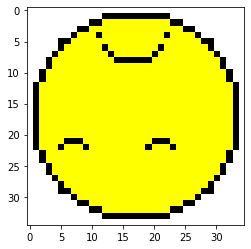

In [15]:
errors = np.abs(y_predicted - y_test)
print("Image Regressor lowest confidence:", np.max(errors))
plt.imshow(X_test[np.argmax(errors)], cmap = cmap)